<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [1]:
#TODO
file = 'lincoln-last-speech.txt'
with open(file) as file_object:
    lAddress = file_object.read()
lAddress[0:70]

'We meet this evening, not in sorrow, but in gladness of heart. The eva'

##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [2]:
#TODO
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
vWord = word_tokenize(lAddress.lower())
vWord[:10]

['we', 'meet', 'this', 'evening', ',', 'not', 'in', 'sorrow', ',', 'but']

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [4]:
#TODO
sWord = stopwords.words(fileids='english')
print(sWord)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [5]:
import re
vWord = [word for word in vWord if re.match(r'\w.*', word)]

In [6]:
#TODO
cleanWord = [word for word in vWord if word not in sWord]
print(cleanWord[0:10])

['meet', 'evening', 'sorrow', 'gladness', 'heart', 'evacuation', 'petersburg', 'richmond', 'surrender', 'principal']


##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [7]:
#TODO
word_set = list(set(cleanWord))
word_count = []
for word in word_set:
    count = 0
    for element in cleanWord:
        if word == element:
            count += 1
    word_count.append(count)

frequency = [(word, count) for word, count in zip(word_set, word_count) ]
frequency = sorted(frequency, key = (lambda ordered: ordered[1]), reverse=True)

word_set = [word for (word, count) in frequency]
word_count = [count for (word, count) in frequency]
frequency[:7]

[('louisiana', 18),
 ('government', 12),
 ('state', 11),
 ('plan', 11),
 ('union', 11),
 ('states', 10),
 ('new', 10)]

##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

In [8]:
from matplotlib import pyplot as plt

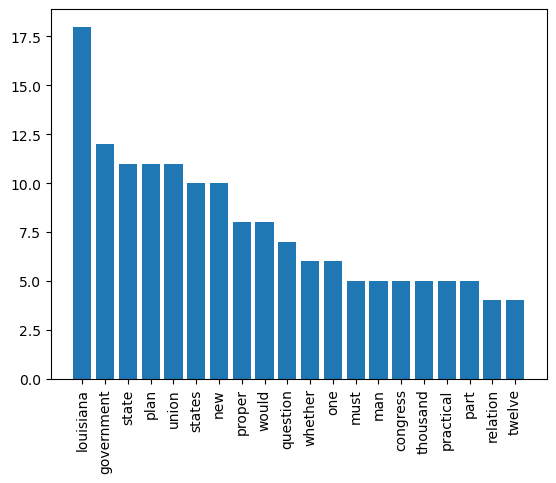

In [14]:
#TODO
plt.bar(word_set[:20], word_count[:20])
plt.xticks(rotation=90)
plt.show()

In [111]:
from wordcloud import WordCloud

In [112]:
cleanWord = " ".join(cleanWord)+" "

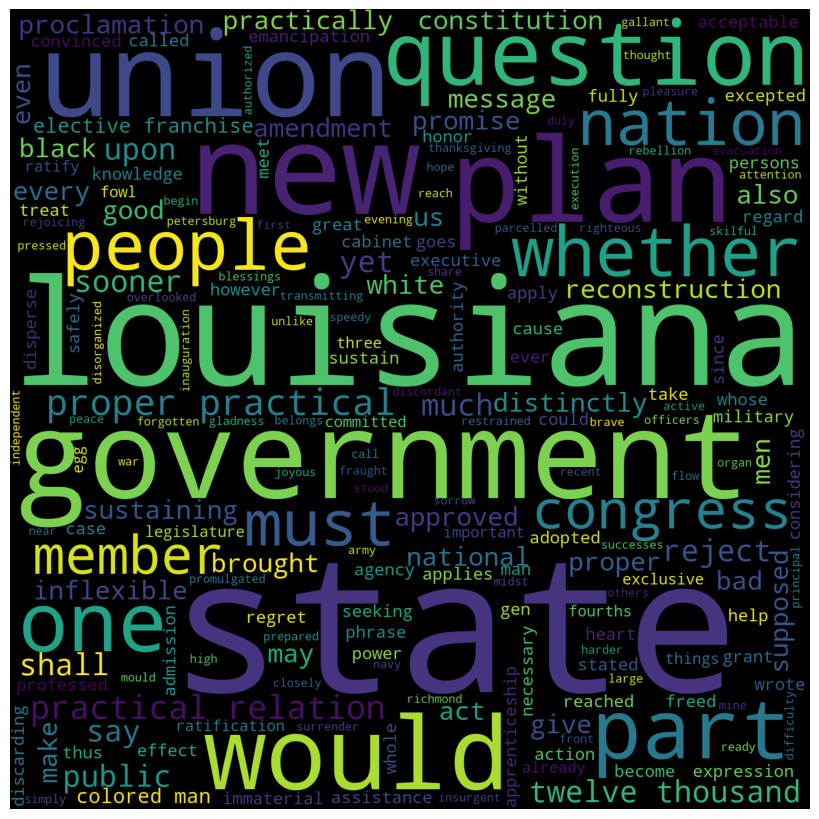

In [113]:

wordcloud = WordCloud(width=1500, height=1500, stopwords=sWord).generate(cleanWord)
plt.figure(figsize=(8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)


##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [15]:
import pandas as pd
import numpy as np

In [16]:
#TODO

df = pd.read_csv('flights.csv')

In [17]:
# All records correspond to the year 2013; as a result, we can drop this feature
df.drop('year', axis=1, inplace=True)

In [18]:
# The number of flights per month
flight_count = df.groupby('month').count()['day']

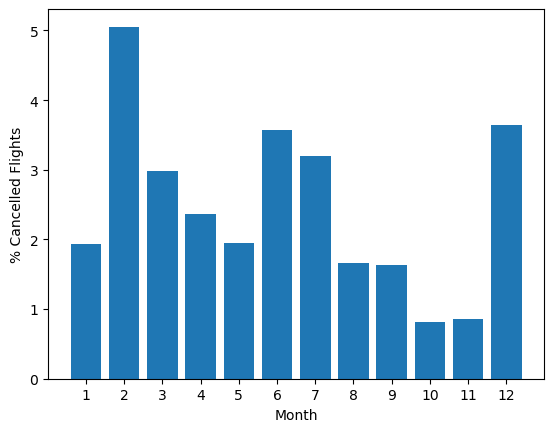

In [19]:
# It seems that the flights with dep_time Nan have been cancelled
cancelled_flights = df[df['dep_time'].isnull()]
cancelled_count = cancelled_flights.groupby('month').count()['day']
cancelled_proportion = pd.concat([flight_count, cancelled_count], axis=1)
cancelled_proportion.columns = ['total', 'cancelled']
cancelled_proportion['proportion'] = cancelled_proportion['cancelled']*100/cancelled_proportion['total']
cancelled_proportion.reset_index(inplace=True)
cancelled_proportion['month'] = cancelled_proportion['month'].astype('string')
plt.bar(cancelled_proportion['month'], cancelled_proportion['proportion'])
plt.xlabel('Month')
plt.ylabel('% Cancelled Flights')
plt.show()

##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [7]:
#TODO

##### c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [8]:
#TODO

##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [9]:
#TODO

##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [11]:
vText = ['google','logo','dig', 'blog', 'boogie']

In [12]:
#TODO

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [13]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']

In [14]:
#TODO

##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [15]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"

In [16]:
#TODO

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [17]:
myText = "Each of the three and four character words will be gone now"

In [18]:
#TODO

##### e) Extract all the three numbers embedded in the following text.

In [19]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'

In [20]:
#TODO

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [21]:
myText = 'The salries are reported (in millions) for every company.'

In [22]:
#TODO

##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [23]:
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]

In [24]:
#TODO

##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [25]:
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'

In [26]:
#TODO

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [27]:
myText = 'Math symbols are $written$ in $between$ dollar $signs$'

In [28]:
#TODO

##### j) Extract all the valid equations in the following text.

In [29]:
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

In [30]:
#TODO